## Name :  Sanket Kale Student ID :  R00195793

## Establish Baseline

In [1]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('adult.csv',delimiter=",", names=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dealing with Missing values

In [4]:
data.replace("?", np.nan, inplace = True)
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.isnull().sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
workclass_mode = data['workclass'].value_counts().idxmax()
occupation_mode = data['occupation'].value_counts().idxmax()
native_country_mode = data['native-country'].value_counts().idxmax()

## Replace all null values into by most frequent value

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data_man = data

data_man["workclass"].replace(np.nan, workclass_mode, inplace = True)
data_man["occupation"].replace(np.nan, occupation_mode, inplace = True)
data_man["native-country"].replace(np.nan, native_country_mode, inplace = True)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
data_man.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Dealing with Outliers

In [11]:
data.skew() 

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [12]:
num_data = [i for i in data.columns if data[i].dtype != 'O']
format(len(num_data))

'6'

In [13]:
'The numerical variables are :', num_data

('The numerical variables are :',
 ['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

In [14]:
data_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
data_loss_withoutzero.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K


In [15]:
data_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
data_gain_withoutzero.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K


In [16]:
num_col=list(data.select_dtypes(include=["int64"]).columns) 
num_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [17]:
l_limits=[]
u_limits=[]
QR_values=[]

for i in range(len(num_col)):
    
    q1=data[num_col[i]].quantile(0.25) 
    q3=data[num_col[i]].quantile(0.75) 
    QR=q3-q1 
    QR_values.append(QR)
    l_limit=q1-(1.5*QR) 
    l_limits.append(l_limit)
    u_limit=q3+1.5*QR 
    u_limits.append(u_limit)

In [18]:
QR=pd.DataFrame({"numeric_columns":num_col,"lower_limits":l_limits,
                        "upper_limits":u_limits,"IQR_values":QR_values})
QR 

,numeric_columns,lower_limits,upper_limits,IQR_values
0,age,-2.0,78.0,20.0
1,fnlwgt,-61009.0,415887.0,119224.0
2,education-num,4.5,16.5,3.0
3,capital-gain,0.0,0.0,0.0
4,capital-loss,0.0,0.0,0.0
5,hours-per-week,32.5,52.5,5.0


In [19]:
Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

In [20]:
"Capital-Loss Lower Limit :",lower_limit_loss

('Capital-Loss Lower Limit :', 1214.5)

In [21]:
"Capital-Loss Upper Limit :",upper_limit_loss

('Capital-Loss Upper Limit :', 2434.5)

In [22]:
Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
l_limit_gain=Q1_gain-(1.5*IQR_gain)
u_limit_gain=Q3_gain+(1.5*IQR_gain)

In [23]:
print("outlier number for hours-per-week : {}".format(data[(data["hours-per-week"]<(l_limits[4]))|(data["hours-per-week"]>(u_limits[4]))].shape[0]))

outlier number for hours-per-week : 32561


In [24]:
print("Final Weight Outlier Number :{}".format(data[(data["fnlwgt"]<(l_limits[1]))|(data["fnlwgt"]>(u_limits[1]))].shape[0]))

Final Weight Outlier Number :992


In [25]:
data.drop(data[data["fnlwgt"]>900000].index,inplace=True) 

In [26]:
round(data[num_data].describe()), 2

(           age    fnlwgt  education-num  capital-gain  capital-loss  \
 count  32541.0   32541.0        32541.0       32541.0       32541.0   
 mean      39.0  189215.0           10.0        1078.0          87.0   
 std       14.0  103014.0            3.0        7387.0         403.0   
 min       17.0   12285.0            1.0           0.0           0.0   
 25%       28.0  117791.0            9.0           0.0           0.0   
 50%       37.0  178322.0           10.0           0.0           0.0   
 75%       48.0  236879.0           12.0           0.0           0.0   
 max       90.0  889965.0           16.0       99999.0        4356.0   
 
        hours-per-week  
 count         32541.0  
 mean             40.0  
 std              12.0  
 min               1.0  
 25%              40.0  
 50%              40.0  
 75%              45.0  
 max              99.0  ,
 2)

### Categorical Data

In [27]:
data['sex'] = data['sex'].map({'Male': '1', 'Female': '0'})  
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

data.drop(['marital-status'], axis=1,inplace=True)
data.drop(['education'], axis=1,inplace=True)

### LableEncoder

In [28]:
data.head()

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Adm-clerical,0,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Exec-managerial,1,1,1,0,0,13,United-States,0
2,38,Private,215646,9,Handlers-cleaners,0,1,1,0,0,40,United-States,0
3,53,Private,234721,7,Handlers-cleaners,1,0,1,0,0,40,United-States,0
4,28,Private,338409,13,Prof-specialty,1,0,0,0,0,40,Cuba,0


In [29]:
labels = ['workclass', 'occupation', 'native-country']
le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])
data

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,13,0,0,1,1,2174,0,40,38,0
1,50,5,83311,13,3,1,1,1,0,0,13,38,0
2,38,3,215646,9,5,0,1,1,0,0,40,38,0
3,53,3,234721,7,5,1,0,1,0,0,40,38,0
4,28,3,338409,13,9,1,0,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,12,1,1,0,0,0,38,38,0
32557,40,3,154374,9,6,1,1,1,0,0,40,38,1
32558,58,3,151910,9,0,0,1,0,0,0,40,38,0
32559,22,3,201490,9,0,0,1,1,0,0,20,38,0


## Scaling Data

In [30]:
X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

## Handling imbalance data with using SMOTE

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [32]:
Y_test.shape

(9763,)

<=50K:  5441
>50K :  17337


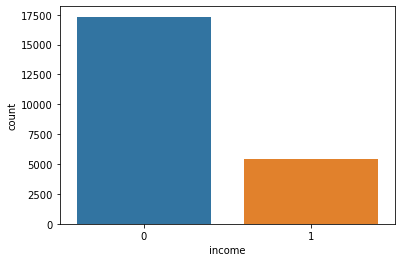

In [33]:
import seaborn as sb
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22778, 12)
(22778,)
(9763, 12)
(9763,)


In [35]:
sm = SMOTE(random_state=0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

<=50K:  17337
>50K :  17337


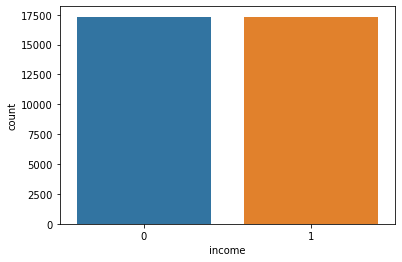

In [36]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

### Implementation of classifier

In [37]:
classifiers = [LogisticRegression(solver='newton-cg'),
    KNeighborsClassifier(n_neighbors=17), 
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    RidgeClassifier(),GradientBoostingClassifier(),
    SVC(),RandomForestClassifier()]

for classifier in classifiers:
        print(type(classifier).__name__)        
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        score = pipe.score(X_train, Y_train)       
        print("F1 score: {:}".format(f1_score(Y_test,Y_pred)))
        

LogisticRegression
F1 score: 0.6743065935891049
KNeighborsClassifier
F1 score: 0.6535586610334742
LinearDiscriminantAnalysis
F1 score: 0.641818744200433
GaussianNB
F1 score: 0.5793438639125151
RidgeClassifier
F1 score: 0.641818744200433
GradientBoostingClassifier
F1 score: 0.7031814895155458
SVC
F1 score: 0.6694560669456067
RandomForestClassifier
F1 score: 0.6903160040774721


## Hyperparameter tuning

#### Random Search

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)


objrandom_grid = {'n_estimators': n_estimators,              
               'max_depth': max_depth,              
               }


## Random Forest Classifier with Hyper parameter tunning

In [39]:
objrf = RandomForestClassifier()
objrf = RandomizedSearchCV(estimator = objrf,scoring= "f1", param_distributions = objrandom_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1,)
objrf.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.4min remaining:   26.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [40]:
objrf.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=200)

In [41]:
objrf.best_score_

0.8908419875378314

In [42]:
objrf = RandomForestClassifier(max_depth=50, n_estimators=200)
objrf.fit(X_train, Y_train)
y_pred = objrf.predict(X_test)
print(f1_score(Y_test,y_pred))

0.6940695296523517


## GradientBoostingClassifier with hyper parameter tunning

In [45]:
objrf = GradientBoostingClassifier()
objrf_random = RandomizedSearchCV(estimator = objrf,scoring= "f1", param_distributions = objrandom_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1,)
objrf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 17.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 25.1min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [46]:
objrf_random.best_estimator_

GradientBoostingClassifier(max_depth=20, n_estimators=200)

In [47]:
objrf_random.best_score_

0.8527389015815259

In [48]:
objrf = GradientBoostingClassifier(max_depth=60, max_features='sqrt',min_samples_split=5, n_estimators=200)
objrf_random.fit(X_train, Y_train)
y_pred = objrf_random.predict(X_test)
print(f1_score(Y_test,y_pred))

0.7186393780783727


## Logistic Regression with hyper parameter tunning

In [40]:
!pip install sklearn.learning_curve

ERROR: Could not find a version that satisfies the requirement sklearn.learning_curve (from versions: none)
ERROR: No matching distribution found for sklearn.learning_curve


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import f1_score


C_param_range = [0.001,0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','f1 score'])
sepal_acc_table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train,Y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = f1_score(Y_test,y_pred)
    
    j += 1
    
print(max(sepal_acc_table['f1 score']))

0.6744186046511629


## Basic Experimentation

In [50]:
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

data = pd.read_csv('adult.csv',delimiter=",", names=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])


data.replace("?", np.nan, inplace = True)
data.head(5)

data.isnull().sum() 

workclass_mode = data['workclass'].value_counts().idxmax()
occupation_mode = data['occupation'].value_counts().idxmax()
native_country_mode = data['native-country'].value_counts().idxmax()

data_man = data

data_man["workclass"].replace(np.nan, workclass_mode, inplace = True)
data_man["occupation"].replace(np.nan, occupation_mode, inplace = True)
data_man["native-country"].replace(np.nan, native_country_mode, inplace = True)

data_man.isnull().sum()

data.skew() 

num_data = [i for i in data.columns if data[i].dtype != 'O']
format(len(num_data))

data_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
data_loss_withoutzero.head()

data_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
data_gain_withoutzero.head()

num_col=list(data.select_dtypes(include=["int64"]).columns) 
num_col

lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(num_col)):
    
    Q1=data[num_col[i]].quantile(0.25) 
    Q3=data[num_col[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

IQR_t=pd.DataFrame({"numeric_columns":num_col,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_t 

Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

data.drop(data[data["fnlwgt"]>900000].index,inplace=True) 

round(data[num_data].describe()), 2


data['sex'] = data['sex'].map({'Male': '1', 'Female': '0'})  
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

data.drop(['marital-status'], axis=1,inplace=True)
data.drop(['education'], axis=1,inplace=True)
data.head()

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Adm-clerical,0,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Exec-managerial,1,1,1,0,0,13,United-States,0
2,38,Private,215646,9,Handlers-cleaners,0,1,1,0,0,40,United-States,0
3,53,Private,234721,7,Handlers-cleaners,1,0,1,0,0,40,United-States,0
4,28,Private,338409,13,Prof-specialty,1,0,0,0,0,40,Cuba,0


## OneHot Encoder Implementation 

In [51]:
data=pd.get_dummies(data, columns=['workclass'], drop_first=True)
data=pd.get_dummies(data, columns=['occupation'], drop_first=True)
data=pd.get_dummies(data, columns=['native-country'], drop_first=True)

In [52]:
data

,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,1,1,2174,0,40,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,1,1,0,0,13,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,1,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,1,0,0,0,38,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,1,1,0,0,40,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,1,0,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,1,1,0,0,20,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(Y_train.head())

13016    0
26951    0
20919    0
30301    0
12368    0
Name: income, dtype: int64


In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

<=50K:  17337
>50K :  17337


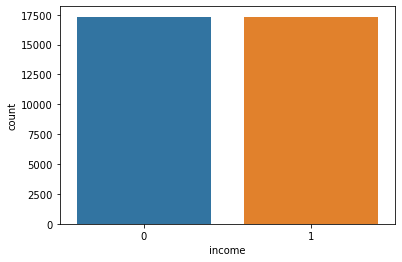

In [56]:
import seaborn as sb
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

## Feature selection techniques

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

### SelectPercentile

In [58]:
from sklearn.feature_selection import SelectPercentile, chi2
a = SelectPercentile(chi2, percentile=10).fit(X_train, Y_train)
X_train = a.transform(X_train)
X_test = a.transform(X_test)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
classifiers = [LogisticRegression(solver='newton-cg'),
    KNeighborsClassifier(n_neighbors=17), # Some trial and error I don't show went into this hyperpa
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    RidgeClassifier(),GradientBoostingClassifier(),
    SVC(),BaggingClassifier(),RandomForestClassifier()]

for classifier in classifiers:
        print(type(classifier).__name__)        
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        score = pipe.score(X_train, Y_train)       
        print("F1 score: {:.2f}".format(f1_score(Y_test,Y_pred)))

LogisticRegression
F1 score: 0.62
KNeighborsClassifier
F1 score: 0.61
LinearDiscriminantAnalysis
F1 score: 0.61
GaussianNB
F1 score: 0.52
RidgeClassifier
F1 score: 0.61
GradientBoostingClassifier
F1 score: 0.62
SVC
F1 score: 0.62
BaggingClassifier
F1 score: 0.63
RandomForestClassifier
F1 score: 0.63


## Research 

In [2]:
data = pd.read_csv('adult.csv',delimiter=",", names=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])


data.replace("?", np.nan, inplace = True)
data.head(5)

data.isnull().sum() 

workclass_mode = data['workclass'].value_counts().idxmax()
occupation_mode = data['occupation'].value_counts().idxmax()
native_country_mode = data['native-country'].value_counts().idxmax()

data_man = data

data_man["workclass"].replace(np.nan, workclass_mode, inplace = True)
data_man["occupation"].replace(np.nan, occupation_mode, inplace = True)
data_man["native-country"].replace(np.nan, native_country_mode, inplace = True)

data_man.isnull().sum()

data.skew() 

num_data = [i for i in data.columns if data[i].dtype != 'O']
format(len(num_data))

data_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
data_loss_withoutzero.head()

data_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
data_gain_withoutzero.head()

num_col=list(data.select_dtypes(include=["int64"]).columns) 
num_col

lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(num_col)):
    
    Q1=data[num_col[i]].quantile(0.25) 
    Q3=data[num_col[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

IQR_t=pd.DataFrame({"numeric_columns":num_col,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_t 

Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

data.drop(data[data["fnlwgt"]>900000].index,inplace=True) 

round(data[num_data].describe()), 2


data['sex'] = data['sex'].map({'Male': '1', 'Female': '0'}) 
print(data['sex']) 
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

#relationship and marital.status contain the same information now, so one of them can be removed
data.drop(['marital-status'], axis=1,inplace=True)

data.drop(['education'], axis=1,inplace=True)
data.head()

labels = ['workclass', 'occupation', 'native-country']

le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])
data

X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(Y_train.head())


0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32541, dtype: object
13016    0
26951    0
20919    0
30301    0
12368    0
Name: income, dtype: int64


<=50K:  5441
>50K :  17337


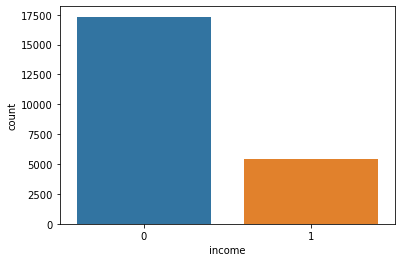

In [3]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [4]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<=50K:  5441
>50K :  5441


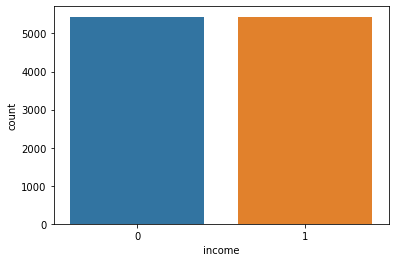

In [5]:

import seaborn as sb
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
classifiers = [
    LogisticRegression()
    ]

for classifier in classifiers:
        print(type(classifier).__name__)        
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        score = pipe.score(X_train, Y_train)       
        print("F1 score: {:}".format(f1_score(Y_test,Y_pred)))

LogisticRegression
F1 score: 0.6189806678383127


### NearMiss2

In [7]:
data = pd.read_csv('adult.csv',delimiter=",", names=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])


data.replace("?", np.nan, inplace = True)
data.head(5)

data.isnull().sum() 

workclass_mode = data['workclass'].value_counts().idxmax()
occupation_mode = data['occupation'].value_counts().idxmax()
native_country_mode = data['native-country'].value_counts().idxmax()

data_man = data

data_man["workclass"].replace(np.nan, workclass_mode, inplace = True)
data_man["occupation"].replace(np.nan, occupation_mode, inplace = True)
data_man["native-country"].replace(np.nan, native_country_mode, inplace = True)

data_man.isnull().sum()

data.skew() 

num_data = [i for i in data.columns if data[i].dtype != 'O']
format(len(num_data))

data_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
data_loss_withoutzero.head()

data_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
data_gain_withoutzero.head()

num_col=list(data.select_dtypes(include=["int64"]).columns) 
num_col

lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(num_col)):
    
    Q1=data[num_col[i]].quantile(0.25) 
    Q3=data[num_col[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

IQR_t=pd.DataFrame({"numeric_columns":num_col,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_t 

Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

data.drop(data[data["fnlwgt"]>900000].index,inplace=True) 

round(data[num_data].describe()), 2


data['sex'] = data['sex'].map({'Male': '1', 'Female': '0'}) 
print(data['sex']) 
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

#relationship and marital.status contain the same information now, so one of them can be removed
data.drop(['marital-status'], axis=1,inplace=True)

data.drop(['education'], axis=1,inplace=True)
data.head()

labels = ['workclass', 'occupation', 'native-country']

le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])
data

X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(Y_train.head())


0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32541, dtype: object
13016    0
26951    0
20919    0
30301    0
12368    0
Name: income, dtype: int64


<=50K:  5441
>50K :  17337


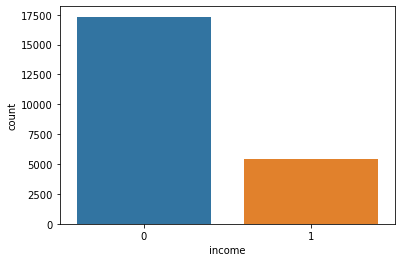

In [8]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [9]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

<=50K:  5441
>50K :  5441


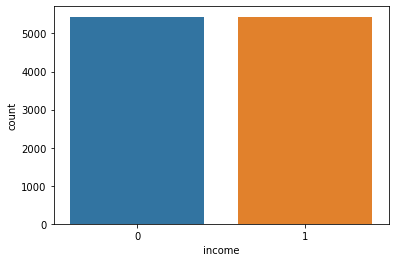

In [10]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
classifiers = [
    LogisticRegression()
    ]

for classifier in classifiers:
        print(type(classifier).__name__)        
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        score = pipe.score(X_train, Y_train)       
        print("F1 score: {:}".format(f1_score(Y_test,Y_pred)))

LogisticRegression
F1 score: 0.6285090455396132


### NearMiss3

In [13]:
data = pd.read_csv('adult.csv',delimiter=",", names=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])


data.replace("?", np.nan, inplace = True)
data.head(5)

data.isnull().sum() 

workclass_mode = data['workclass'].value_counts().idxmax()
occupation_mode = data['occupation'].value_counts().idxmax()
native_country_mode = data['native-country'].value_counts().idxmax()

data_man = data

data_man["workclass"].replace(np.nan, workclass_mode, inplace = True)
data_man["occupation"].replace(np.nan, occupation_mode, inplace = True)
data_man["native-country"].replace(np.nan, native_country_mode, inplace = True)

data_man.isnull().sum()

data.skew() 

num_data = [i for i in data.columns if data[i].dtype != 'O']
format(len(num_data))

data_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
data_loss_withoutzero.head()

data_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
data_gain_withoutzero.head()

num_col=list(data.select_dtypes(include=["int64"]).columns) 
num_col

lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(num_col)):
    
    Q1=data[num_col[i]].quantile(0.25) 
    Q3=data[num_col[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

IQR_t=pd.DataFrame({"numeric_columns":num_col,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_t 

Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

data.drop(data[data["fnlwgt"]>900000].index,inplace=True) 

round(data[num_data].describe()), 2


data['sex'] = data['sex'].map({'Male': '1', 'Female': '0'}) 
print(data['sex']) 
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

#relationship and marital.status contain the same information now, so one of them can be removed
data.drop(['marital-status'], axis=1,inplace=True)

data.drop(['education'], axis=1,inplace=True)
data.head()

labels = ['workclass', 'occupation', 'native-country']

le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])
data

X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(Y_train.head())


0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32541, dtype: object


<=50K:  5441
>50K :  17337


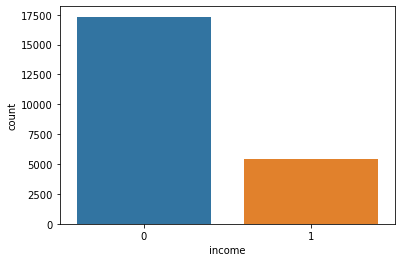

In [14]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [15]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

C:\Users\sanky\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:177: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


<=50K:  5259
>50K :  5441


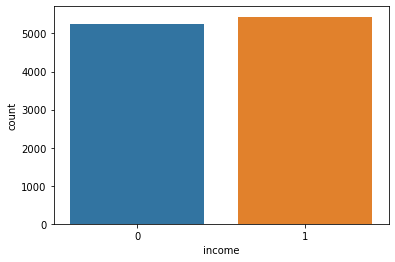

In [16]:
plot_sb = sb.countplot(Y_train, label='Total')
greaterthan50, lessthan50 = Y_train.value_counts()
print('<=50K: ',lessthan50)
print('>50K : ',greaterthan50)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
classifiers = [
    LogisticRegression()
    ]

for classifier in classifiers:
        print(type(classifier).__name__)        
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        score = pipe.score(X_train, Y_train)       
        print("F1 score: {:}".format(f1_score(Y_test,Y_pred)))

LogisticRegression
F1 score: 0.6702218430034129
